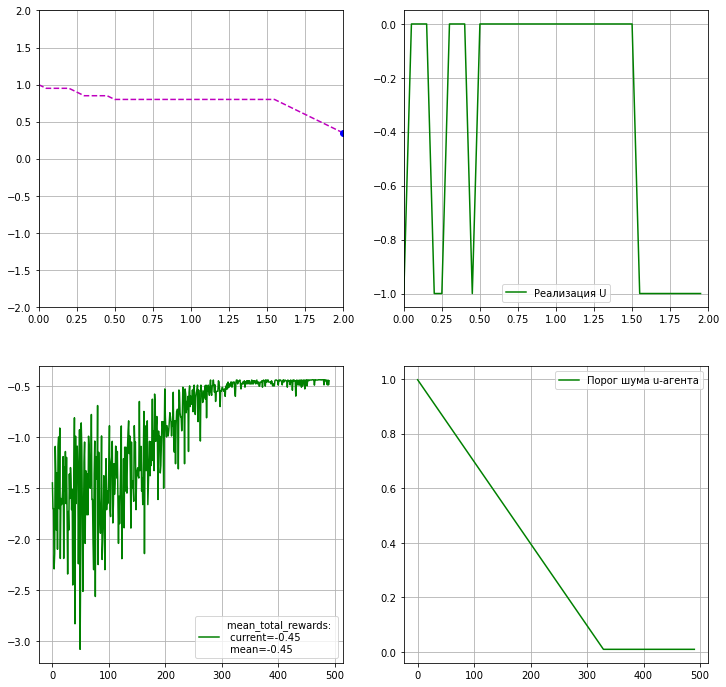

In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np
import torch.nn as nn
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
from Agents.DRQN import DRQN_WholeHistory
from Agents.Utilities.SequentialNetworkWithTypes import SequentialNetworkWithTypes, LayerType
from Agents.Utilities.Noises import DiscreteUniformNoise
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import ContinuousAgentMaker
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 500

#environment initialization
env = SimpleControlProblem()
action_n = 3
action_values = np.linspace(env.action_min, env.action_max, action_n).reshape(action_n, 1)

#agent initialization
DRQN = ContinuousAgentMaker(DRQN_WholeHistory)
q_model = SequentialNetworkWithTypes(env.state_dim,
                                     [(LayerType.Dense, 128),
                                      (LayerType.LSTM, 64),
                                      (LayerType.Dense, 64),
                                      (LayerType.Dense, action_n)])
noise = DiscreteUniformNoise(action_n, threshold_decrease=1.5/episode_n)
agent = DRQN(q_model, noise, action_values=action_values, burning_len=8, trajectory_len=16, q_model_lr=1e-3, gamma=1, batch_size=8, tau=1e-3)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=10)
solver.go(env, agent, episode_n=episode_n, show=visualizer.show)